## Parte 1 - Importação das bibliotecas utilizadas


In [14]:
# Importação da biblioteca Pandas para manipulação dos dados
import pandas as pd

# Biblioteca Seaborn para criação de gráficos
import seaborn as sns

# Biblioteca Matplotlib para criação de gráficos
import matplotlib.pyplot as plt

# Biblioteca para ignorar mensagens de avisos (warning) ao rodar uma cédula de código
import warnings
warnings.filterwarnings('ignore')

---
## Parte 2 - Importação dos Dados

In [22]:
# Função read_csv para importar os dados do diretório do computador
dados = pd.read_csv('dados_salarial_funcionarios.csv')

In [ ]:
# Listando o nome das colunas
dados.columns

In [24]:
# Imprimindo as 5 primeiras linhas
dados.head()

,Idade,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento
0,38,Masculino,Pós-graduação,Química / Física,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,02/01/21
1,39,Masculino,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,06/04/21
2,30,Masculino,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,15/04/23
3,38,Feminino,Pós-graduação,Outras,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,04/06/21
4,36,Masculino,Pós-graduação,Outras Engenharias,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,22/03/23


In [26]:
# Observando número de linhas e colunas
dados.shape

(1385, 10)

---
## Parte 3: Análise Exploratória dos Dados(AED)

### Ter uma primeira visão sobre os dados e extrair os primeiros insights

In [27]:
# Imprime o tipo de dado em cada coluna: object - variáveis categóricas, float64 e int64 - variáveis numéricas
dados.dtypes

Idade                       int64
Genero                     object
Nivel Ensino               object
Area Formacao              object
Setor                      object
Nivel                      object
Faixa Salarial             object
Anos experiencia           object
Faixa Salarial – numero     int64
Data ultimo aumento        object
dtype: object

In [28]:
# Convertendo o campo Data para datetime, utilizando a função to_datetime do Pandas
dados['Data ultimo aumento'] = pd.to_datetime(dados['Data ultimo aumento'])

In [29]:
# Verificando a alteração
dados.head()

,Idade,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento
0,38,Masculino,Pós-graduação,Química / Física,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,2021-02-01
1,39,Masculino,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,2021-06-04
2,30,Masculino,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-04-15
3,38,Feminino,Pós-graduação,Outras,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,2021-04-06
4,36,Masculino,Pós-graduação,Outras Engenharias,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-03-22


In [31]:
# Criando categorias para separar colunas numéricas e categóricas, para facilitar a AED
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [33]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais
dados[numericas_cols].describe()

,Idade,Faixa Salarial – numero,Data ultimo aumento
count,1385.000000,1385.000000,1385
mean,30.779783,9992.779783,2022-06-15 08:25:17.978339328
min,18.000000,1000.000000,2021-01-01 00:00:00
25%,26.000000,6000.000000,2021-09-19 00:00:00
50%,29.000000,8000.000000,2022-06-09 00:00:00
75%,34.000000,12000.000000,2023-03-05 00:00:00
max,54.000000,45000.000000,2023-12-28 00:00:00
std,6.869018,7353.675097,NaN


In [34]:
# Resumo das variáveis categóricas - Imprime alguns valores de estatística descritiva
dados[categoricas_cols].describe()

,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia
count,1385,1385,1361,1385,1385,1385,1385
unique,2,6,9,23,4,13,6
top,Masculino,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 2 a 3 anos
freq,979,495,588,372,440,295,314


In [35]:
# Verificando se existem valores faltantes nos dados
dados.isna().any()

Idade                      False
Genero                     False
Nivel Ensino               False
Area Formacao               True
Setor                      False
Nivel                      False
Faixa Salarial             False
Anos experiencia           False
Faixa Salarial – numero    False
Data ultimo aumento        False
dtype: bool

In [36]:
# Verificando a quantidade de valores faltantes por coluna
dados.isna().sum()

Idade                       0
Genero                      0
Nivel Ensino                0
Area Formacao              24
Setor                       0
Nivel                       0
Faixa Salarial              0
Anos experiencia            0
Faixa Salarial – numero     0
Data ultimo aumento         0
dtype: int64

In [37]:
# Substituir os valores faltantes por "Nada consta". Argumento inplace = true significa que a modificação será aplicada
# Na mesma variável chamada dados sem precisar criar outra variável
dados['Area Formacao'].fillna('Nada Consta', inplace=True)

In [ ]:
# Caso a coluna faltante não for relevante é possivel excluir
dados.drop('Area Formacao', axis=1, inplace=True)

In [38]:
# Após as correções verificando se ainda há valores faltantes
dados.isna().sum()

Idade                      0
Genero                     0
Nivel Ensino               0
Area Formacao              0
Setor                      0
Nivel                      0
Faixa Salarial             0
Anos experiencia           0
Faixa Salarial – numero    0
Data ultimo aumento        0
dtype: int64

In [39]:
# Verificando se tem valores duplicados
dados.duplicated().sum()

0

In [ ]:
# Removendo valores duplicados
dados.drop_duplicates(inplace=True)

In [40]:
# Número de linhas e colunas após mudanças
dados.shape

(1385, 10)

In [41]:
# Contagem de valores por categoria de 'Nivel'
dados['Nivel'].value_counts()

Nivel
Pleno     440
Júnior    409
Sênior    370
Gestor    166
Name: count, dtype: int64

In [42]:
# Contagem de valores por categorias de 'Faixa Salarial'
dados['Faixa Salarial'].value_counts()

Faixa Salarial
de R$ 8.001/mês a R$ 12.000/mês     295
de R$ 6.001/mês a R$ 8.000/mês      255
de R$ 4.001/mês a R$ 6.000/mês      242
de R$ 12.001/mês a R$ 16.000/mês    140
de R$ 3.001/mês a R$ 4.000/mês      113
de R$ 2.001/mês a R$ 3000/mês       108
de R$ 1.001/mês a R$ 2.000/mês       79
de R$ 16.001/mês a R$ 20.000/mês     59
de R$ 20.001/mês a R$ 25.000/mês     26
de R$ 25.001/mês a R$ 30.000/mês     22
Menos de R$ 1.000/mês                19
de R$ 30.001/mês a R$ 40.000/mês     18
Acima de R$ 40.001/mês                9
Name: count, dtype: int64

In [ ]:
# Criando uma nova coluna
# Função para calcular a média salarial dos funcionários
dados['Média Salarial'] = dados['Faixa Salarial - numero'].mean().round()

In [44]:
# Resultado após inserção de nova coluna
dados.head()

,Idade,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento
0,38,Masculino,Pós-graduação,Química / Física,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,2021-02-01
1,39,Masculino,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,2021-06-04
2,30,Masculino,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-04-15
3,38,Feminino,Pós-graduação,Outras,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,2021-04-06
4,36,Masculino,Pós-graduação,Outras Engenharias,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-03-22


---
## Parte 4: Visualização dos resultados
### O que queremos responder com esses dados?
### 1. Distribuição do número de funcionários por sexo, nível de senioridade e nível de formação
#### Podemos fazer um gráfico com a distribuição de homens e mulheres


In [45]:
# Contagem do número de homens e mulheres na empresa
dados['Genero'].value_counts()

Genero
Masculino    979
Feminino     406
Name: count, dtype: int64

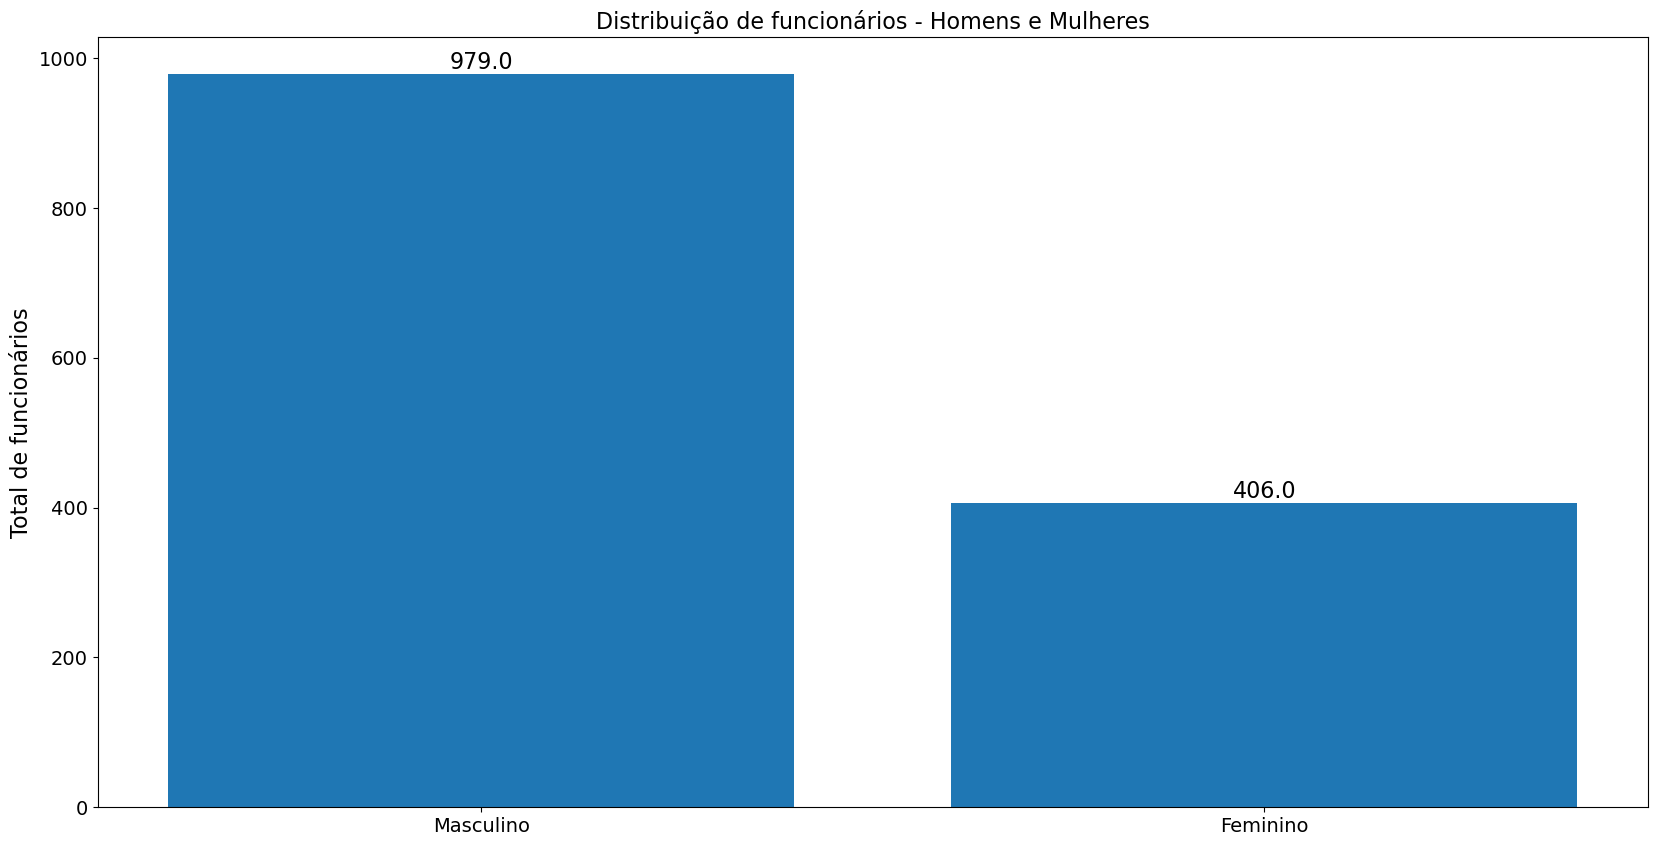

In [46]:
# Gráfico da distribuição por gênero - plt é a biblioteca Matplotlib
plt.figure(figsize=(20,10)) # Aumentar o tamanho da figura na saída dos dados
grafico_1 = plt.bar(dados['Genero'].unique(), dados['Genero'].value_counts()) # plt.bar para gráfico de barras
plt.title('Distribuição de funcionários - Homens e Mulheres', fontsize=16) # plt.title para inserir título no gráfico
plt.ylabel('Total de funcionários', fontsize=16) # plt.ylabel para inserir titulo no gráfico

# Aumentar o tamanho do texto dos eixos
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# Colocando o rótulo nas barras
plt.bar_label(grafico_1, fmt="%.01f", size=16, label_type="edge");

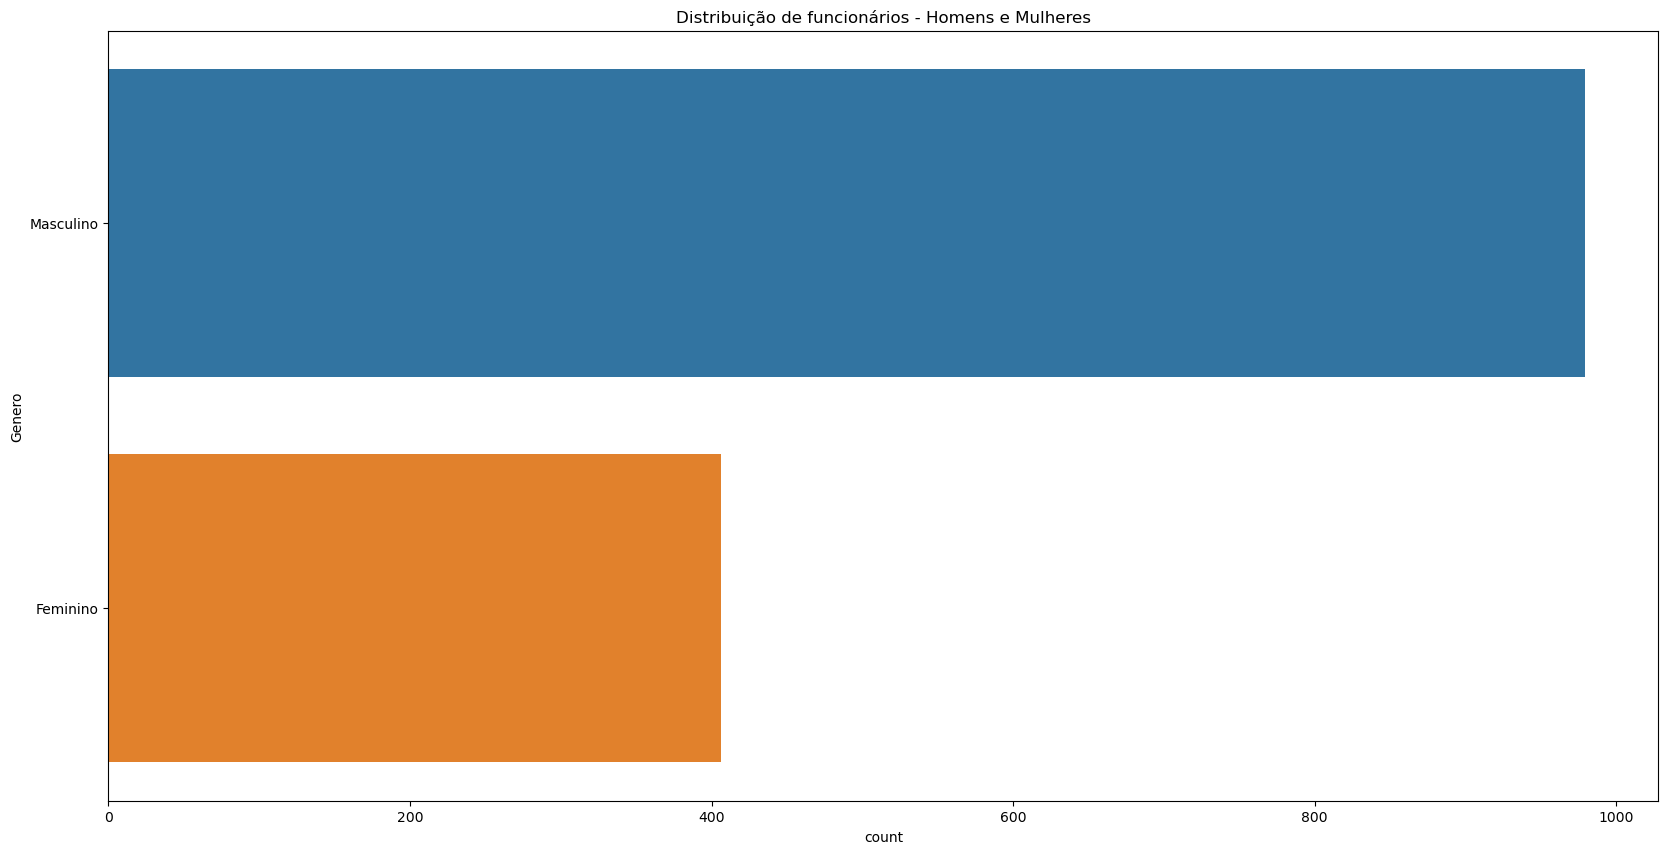

In [47]:
# Gráfico da biblioteca sns - Seaborn

# sns.countplot para criar gráfico de barras. Eixo X é a contagem (Número de valores), eixo Y é a coluna de ordenação
# index para ordenar os valores
plt.figure(figsize=(20, 10))
sns.countplot(y="Genero", data=dados, order=dados['Genero'].value_counts().index) \
.set_title("Distribuição de funcionários - Homens e Mulheres"); # set.title para inserir nome do gráfico

## De acordo com o nível de formação

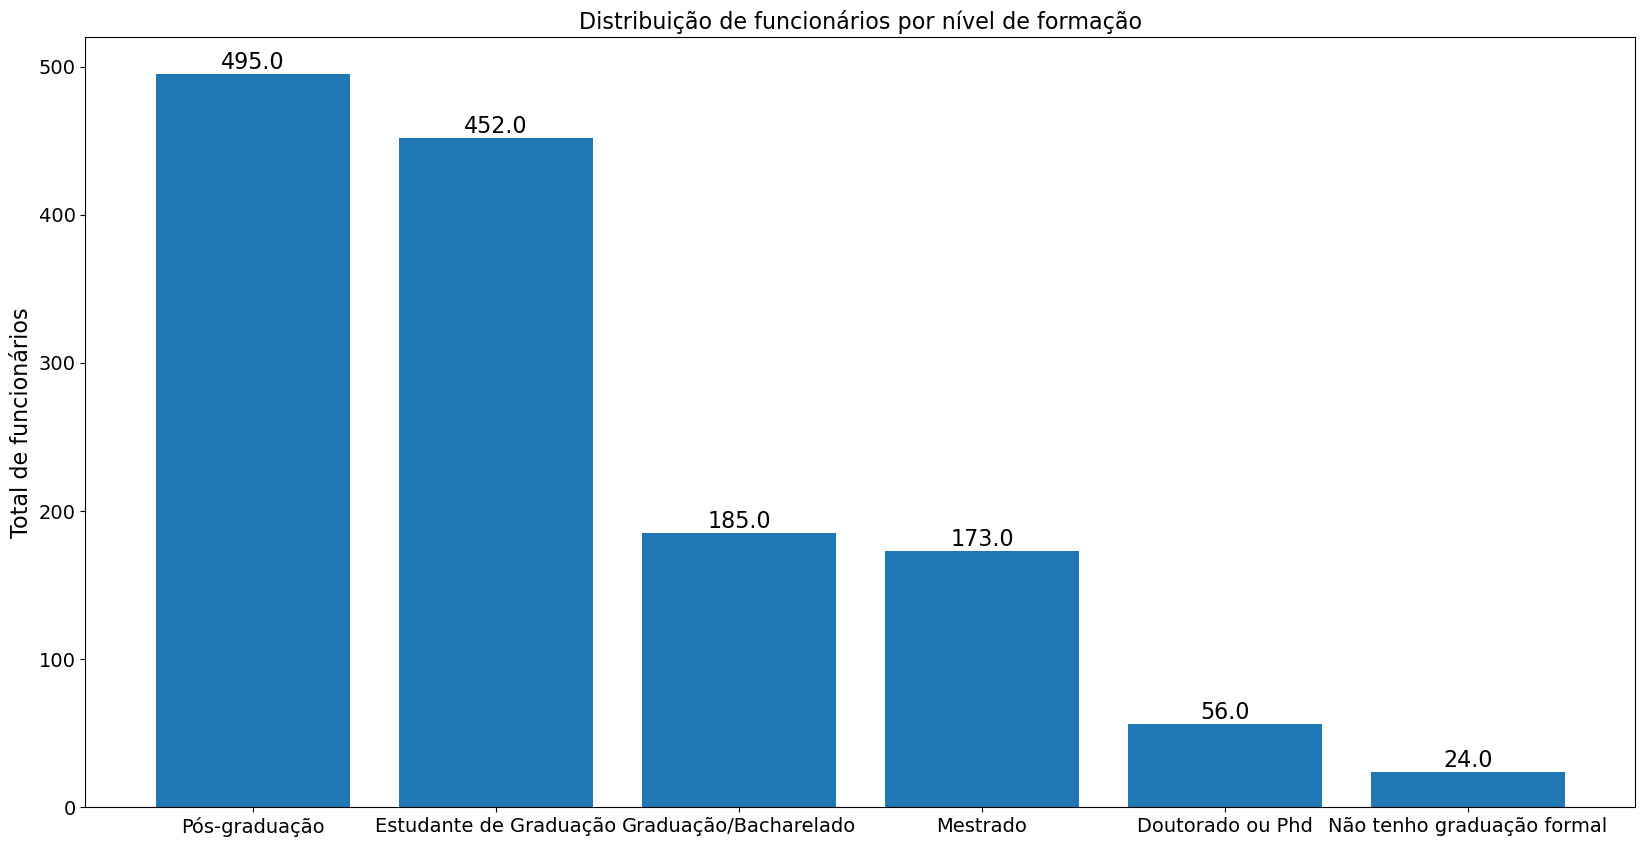

In [48]:
plt.figure(figsize=(20,10))
grafico_2 = plt.bar(dados['Nivel Ensino'].unique(), dados['Nivel Ensino'].value_counts())
plt.title('Distribuição de funcionários por nível de formação', fontsize = 16) # Inserindo o título
plt.ylabel('Total de funcionários', fontsize = 16) # Rótulo do eixo Y

# Aumentar o tamanho do texto dos eixos
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# Colocando o rótulo nas barras
plt.bar_label(grafico_2, fmt="%.01f", size=16, label_type="edge");